In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Simple linear regression

In [4]:
data = pd.read_excel('db_score.xlsx')
x = data['midterm'].values
y = data['score'].values

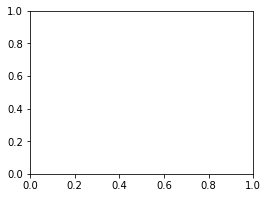

In [63]:
fig, ax = plt.subplots(figsize=(4,3))



Final:
gdv_m=1.684846, gdv_c=24.347451


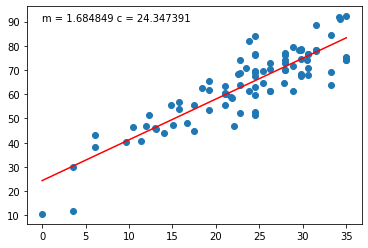

In [66]:
def gradient_descent_vectorized(x, y):
    epochs = 100000
    min_grad = 0.0001
    learning_rate = 0.001
    
    m = 0.0
    c = 0.0
    
    n = len(y)
    
    c_grad = 0.0
    m_grad = 0.0

    for epoch in range(epochs):    
    
        y_pred = m * x + c
        m_grad = (2*(y_pred - y)*x).sum()/n
        c_grad = (2 * (y_pred - y)).sum()/n
        
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad        

        if epoch < 1000:
            if ( epoch % 100 == 0):
                plt.cla()
                plt.scatter(x, y)
                plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')
                plt.text(0, 90, "m = %f c = %f" %(m, c), fontsize = 10)
                plt.savefig("ani{}.png".format(epoch))
        else:
            if ( epoch % 1000 == 0):
                plt.cla()
                plt.scatter(x, y)
                plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')
                plt.text(0, 90, "m = %f c = %f" %(m, c), fontsize = 10)
                plt.savefig("ani{}.png".format(epoch))
    
        if ( abs(m_grad) < min_grad and abs(c_grad) < min_grad ):
            break

    return m, c

m, c = gradient_descent_vectorized(x, y)


print("\n\nFinal:")
print("gdv_m=%f, gdv_c=%f" %(m, c))

# Multiple linear regression

In [5]:
x = data[['attendance','homework','midterm']].values
y = data['score'].values

In [7]:
import statsmodels.api as sm
x_const = sm.add_constant(x)

model = sm.OLS(y, x_const)
ls = model.fit()

print(ls.summary())

ls_c = ls.params[0]
ls_m = ls.params[1]
ls_n = ls.params[2]
ls_l = ls.params[3]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           2.24e-32
Time:                        19:50:27   Log-Likelihood:                -302.25
No. Observations:                  92   AIC:                             612.5
Df Residuals:                      88   BIC:                             622.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.4116     15.824     -1.227      0.2

In [18]:
def gradient_descent_multiple_vectorized(X, y):
    params = []
    epochs = 2000000
    min_grad = 0.0001
    learning_rate = 0.001
    
    m = 0.0
    n = 0.0
    l = 0.0
    c = 0.0
    
    length = len(y)
    
    c_grad = 0.0
    m_grad = 0.0
    n_grad = 0.0
    l_grad = 0.0

    for epoch in range(epochs):    
    
        y_pred = m*X[:,0]+ n*X[:,1] + l*X[:,2] + c
        m_grad = (2*(y_pred - y)*X[:,0]).sum()/length 
        n_grad = (2*(y_pred - y)*X[:,1]).sum()/length
        l_grad = (2*(y_pred - y)*X[:,2]).sum()/length
        c_grad = (2*(y_pred - y)).sum()/length 
        
        m = m - learning_rate * m_grad
        n = n - learning_rate * n_grad
        l = l - learning_rate * l_grad
        c = c - learning_rate * c_grad        

        if ( epoch % 1000 == 0):
            print("epoch %d: m_grad=%f, n_grad=%f, l_grad=%f, c_grad=%f, m=%f, n=%f, l=%f, c=%f" %(epoch, m_grad, n_grad, l_grad, c_grad, m, n, l, c) )
            params.append([epoch,m,n,l,c])
    
        if ( abs(m_grad) < min_grad and abs(n_grad) < min_grad and abs(l_grad) < min_grad and abs(c_grad) < min_grad):
            params.append([epoch,m,n,l,c])
            break

    return params

start_time = time.time()
p = gradient_descent_multiple_vectorized(x, y)
end_time = time.time()

print("%f seconds" %(end_time - start_time))

print("\n\nFinal:")
print("m_grad=%f, n_grad=%f, l_grad=%f, c_grad=%f" %(p[len(p)-1][1], p[len(p)-1][2], p[len(p)-1][3], p[len(p)-1][4]) )
print("ls_m=%f, ls_n=%f, ls_l=%f, ls_c=%f" %(ls_m, ls_n, ls_l, ls_c) )

epoch 0: m_grad=-1003.713820, n_grad=-2385.090065, l_grad=-3227.859378, c_grad=-128.088261, m=1.003714, n=2.385090, l=3.227859, c=0.128088
epoch 1000: m_grad=-149.922477, n_grad=-356.203255, l_grad=-483.462375, c_grad=-19.068796, m=1.225173, n=1.216236, l=1.770221, c=0.088812
epoch 2000: m_grad=-22.438568, n_grad=-53.291192, l_grad=-72.330677, c_grad=-2.791415, m=1.261955, n=1.026955, l=1.564093, c=0.020702
epoch 3000: m_grad=-3.365466, n_grad=-7.972673, l_grad=-10.821345, c_grad=-0.356356, m=1.275990, n=0.998391, l=1.533220, c=-0.050858
epoch 4000: m_grad=-0.511877, n_grad=-1.192593, l_grad=-1.618946, c_grad=0.007729, m=1.286487, n=0.993914, l=1.528567, c=-0.122720
epoch 5000: m_grad=-0.084916, n_grad=-0.178229, l_grad=-0.242177, c_grad=0.061974, m=1.296409, n=0.993049, l=1.527838, c=-0.194401
epoch 6000: m_grad=-0.021006, n_grad=-0.026471, l_grad=-0.036199, c_grad=0.069864, m=1.306211, n=0.992726, l=1.527696, c=-0.265830
epoch 7000: m_grad=-0.011414, n_grad=-0.003768, l_grad=-0.00538

epoch 68000: m_grad=-0.007755, n_grad=0.000181, l_grad=0.000031, c_grad=0.056599, m=1.847055, n=0.980114, l=1.525536, c=-4.213118
epoch 69000: m_grad=-0.007726, n_grad=0.000180, l_grad=0.000031, c_grad=0.056388, m=1.854795, n=0.979934, l=1.525505, c=-4.269611
epoch 70000: m_grad=-0.007697, n_grad=0.000179, l_grad=0.000030, c_grad=0.056179, m=1.862507, n=0.979754, l=1.525474, c=-4.325895
epoch 71000: m_grad=-0.007669, n_grad=0.000179, l_grad=0.000030, c_grad=0.055970, m=1.870190, n=0.979575, l=1.525444, c=-4.381969
epoch 72000: m_grad=-0.007640, n_grad=0.000178, l_grad=0.000030, c_grad=0.055762, m=1.877844, n=0.979397, l=1.525414, c=-4.437835
epoch 73000: m_grad=-0.007612, n_grad=0.000177, l_grad=0.000030, c_grad=0.055555, m=1.885470, n=0.979220, l=1.525383, c=-4.493493
epoch 74000: m_grad=-0.007584, n_grad=0.000177, l_grad=0.000030, c_grad=0.055348, m=1.893068, n=0.979043, l=1.525353, c=-4.548944
epoch 75000: m_grad=-0.007555, n_grad=0.000176, l_grad=0.000030, c_grad=0.055142, m=1.9006

epoch 134000: m_grad=-0.006065, n_grad=0.000141, l_grad=0.000024, c_grad=0.044266, m=2.300832, n=0.969547, l=1.523738, c=-7.524980
epoch 135000: m_grad=-0.006043, n_grad=0.000141, l_grad=0.000024, c_grad=0.044101, m=2.306885, n=0.969406, l=1.523714, c=-7.569163
epoch 136000: m_grad=-0.006020, n_grad=0.000140, l_grad=0.000024, c_grad=0.043937, m=2.312917, n=0.969266, l=1.523690, c=-7.613182
epoch 137000: m_grad=-0.005998, n_grad=0.000140, l_grad=0.000024, c_grad=0.043774, m=2.318926, n=0.969126, l=1.523666, c=-7.657037
epoch 138000: m_grad=-0.005975, n_grad=0.000139, l_grad=0.000024, c_grad=0.043611, m=2.324912, n=0.968986, l=1.523643, c=-7.700729
epoch 139000: m_grad=-0.005953, n_grad=0.000139, l_grad=0.000024, c_grad=0.043449, m=2.330876, n=0.968847, l=1.523619, c=-7.744259
epoch 140000: m_grad=-0.005931, n_grad=0.000138, l_grad=0.000023, c_grad=0.043287, m=2.336818, n=0.968709, l=1.523596, c=-7.787627
epoch 141000: m_grad=-0.005909, n_grad=0.000138, l_grad=0.000023, c_grad=0.043127, 

epoch 197000: m_grad=-0.004797, n_grad=0.000112, l_grad=0.000019, c_grad=0.035009, m=2.641417, n=0.961616, l=1.522389, c=-10.010721
epoch 198000: m_grad=-0.004779, n_grad=0.000111, l_grad=0.000019, c_grad=0.034879, m=2.646205, n=0.961504, l=1.522370, c=-10.045665
epoch 199000: m_grad=-0.004761, n_grad=0.000111, l_grad=0.000019, c_grad=0.034749, m=2.650975, n=0.961393, l=1.522351, c=-10.080478
epoch 200000: m_grad=-0.004743, n_grad=0.000110, l_grad=0.000019, c_grad=0.034620, m=2.655727, n=0.961283, l=1.522332, c=-10.115163
epoch 201000: m_grad=-0.004726, n_grad=0.000110, l_grad=0.000019, c_grad=0.034491, m=2.660462, n=0.961172, l=1.522314, c=-10.149718
epoch 202000: m_grad=-0.004708, n_grad=0.000110, l_grad=0.000019, c_grad=0.034363, m=2.665179, n=0.961062, l=1.522295, c=-10.184145
epoch 203000: m_grad=-0.004691, n_grad=0.000109, l_grad=0.000019, c_grad=0.034235, m=2.669878, n=0.960953, l=1.522276, c=-10.218444
epoch 204000: m_grad=-0.004673, n_grad=0.000109, l_grad=0.000019, c_grad=0.0

epoch 263000: m_grad=-0.003751, n_grad=0.000087, l_grad=0.000015, c_grad=0.027380, m=2.922097, n=0.955080, l=1.521277, c=-12.059243
epoch 264000: m_grad=-0.003738, n_grad=0.000087, l_grad=0.000015, c_grad=0.027278, m=2.925841, n=0.954992, l=1.521262, c=-12.086572
epoch 265000: m_grad=-0.003724, n_grad=0.000087, l_grad=0.000015, c_grad=0.027177, m=2.929572, n=0.954905, l=1.521248, c=-12.113799
epoch 266000: m_grad=-0.003710, n_grad=0.000086, l_grad=0.000015, c_grad=0.027076, m=2.933289, n=0.954819, l=1.521233, c=-12.140925
epoch 267000: m_grad=-0.003696, n_grad=0.000086, l_grad=0.000015, c_grad=0.026975, m=2.936992, n=0.954733, l=1.521218, c=-12.167951
epoch 268000: m_grad=-0.003682, n_grad=0.000086, l_grad=0.000015, c_grad=0.026875, m=2.940681, n=0.954647, l=1.521204, c=-12.194876
epoch 269000: m_grad=-0.003669, n_grad=0.000085, l_grad=0.000015, c_grad=0.026775, m=2.944356, n=0.954561, l=1.521189, c=-12.221701
epoch 270000: m_grad=-0.003655, n_grad=0.000085, l_grad=0.000014, c_grad=0.0

epoch 337000: m_grad=-0.002848, n_grad=0.000066, l_grad=0.000011, c_grad=0.020785, m=3.164740, n=0.949429, l=1.520316, c=-13.830159
epoch 338000: m_grad=-0.002837, n_grad=0.000066, l_grad=0.000011, c_grad=0.020708, m=3.167583, n=0.949363, l=1.520305, c=-13.850905
epoch 339000: m_grad=-0.002827, n_grad=0.000066, l_grad=0.000011, c_grad=0.020631, m=3.170415, n=0.949297, l=1.520294, c=-13.871575
epoch 340000: m_grad=-0.002816, n_grad=0.000066, l_grad=0.000011, c_grad=0.020554, m=3.173236, n=0.949231, l=1.520282, c=-13.892167
epoch 341000: m_grad=-0.002806, n_grad=0.000065, l_grad=0.000011, c_grad=0.020478, m=3.176047, n=0.949166, l=1.520271, c=-13.912683
epoch 342000: m_grad=-0.002795, n_grad=0.000065, l_grad=0.000011, c_grad=0.020402, m=3.178848, n=0.949101, l=1.520260, c=-13.933123
epoch 343000: m_grad=-0.002785, n_grad=0.000065, l_grad=0.000011, c_grad=0.020326, m=3.181638, n=0.949036, l=1.520249, c=-13.953487
epoch 344000: m_grad=-0.002775, n_grad=0.000065, l_grad=0.000011, c_grad=0.0

epoch 401000: m_grad=-0.002244, n_grad=0.000052, l_grad=0.000009, c_grad=0.016377, m=3.326913, n=0.945652, l=1.519674, c=-15.013763
epoch 402000: m_grad=-0.002236, n_grad=0.000052, l_grad=0.000009, c_grad=0.016317, m=3.329152, n=0.945600, l=1.519665, c=-15.030110
epoch 403000: m_grad=-0.002227, n_grad=0.000052, l_grad=0.000009, c_grad=0.016256, m=3.331384, n=0.945548, l=1.519656, c=-15.046396
epoch 404000: m_grad=-0.002219, n_grad=0.000052, l_grad=0.000009, c_grad=0.016196, m=3.333607, n=0.945497, l=1.519647, c=-15.062622
epoch 405000: m_grad=-0.002211, n_grad=0.000051, l_grad=0.000009, c_grad=0.016135, m=3.335822, n=0.945445, l=1.519638, c=-15.078787
epoch 406000: m_grad=-0.002203, n_grad=0.000051, l_grad=0.000009, c_grad=0.016075, m=3.338029, n=0.945394, l=1.519630, c=-15.094893
epoch 407000: m_grad=-0.002194, n_grad=0.000051, l_grad=0.000009, c_grad=0.016016, m=3.340227, n=0.945342, l=1.519621, c=-15.110938
epoch 408000: m_grad=-0.002186, n_grad=0.000051, l_grad=0.000009, c_grad=0.0

epoch 468000: m_grad=-0.001748, n_grad=0.000041, l_grad=0.000007, c_grad=0.012761, m=3.459969, n=0.942554, l=1.519147, c=-15.984870
epoch 469000: m_grad=-0.001742, n_grad=0.000041, l_grad=0.000007, c_grad=0.012714, m=3.461715, n=0.942513, l=1.519140, c=-15.997607
epoch 470000: m_grad=-0.001735, n_grad=0.000040, l_grad=0.000007, c_grad=0.012666, m=3.463453, n=0.942473, l=1.519133, c=-16.010297
epoch 471000: m_grad=-0.001729, n_grad=0.000040, l_grad=0.000007, c_grad=0.012619, m=3.465186, n=0.942433, l=1.519126, c=-16.022940
epoch 472000: m_grad=-0.001723, n_grad=0.000040, l_grad=0.000007, c_grad=0.012572, m=3.466911, n=0.942392, l=1.519119, c=-16.035535
epoch 473000: m_grad=-0.001716, n_grad=0.000040, l_grad=0.000007, c_grad=0.012526, m=3.468631, n=0.942352, l=1.519112, c=-16.048084
epoch 474000: m_grad=-0.001710, n_grad=0.000040, l_grad=0.000007, c_grad=0.012479, m=3.470344, n=0.942312, l=1.519106, c=-16.060587
epoch 475000: m_grad=-0.001703, n_grad=0.000040, l_grad=0.000007, c_grad=0.0

epoch 534000: m_grad=-0.001367, n_grad=0.000032, l_grad=0.000005, c_grad=0.009980, m=3.562280, n=0.940171, l=1.518741, c=-16.731580
epoch 535000: m_grad=-0.001362, n_grad=0.000032, l_grad=0.000005, c_grad=0.009943, m=3.563645, n=0.940140, l=1.518736, c=-16.741542
epoch 536000: m_grad=-0.001357, n_grad=0.000032, l_grad=0.000005, c_grad=0.009906, m=3.565005, n=0.940108, l=1.518731, c=-16.751466
epoch 537000: m_grad=-0.001352, n_grad=0.000031, l_grad=0.000005, c_grad=0.009869, m=3.566360, n=0.940076, l=1.518725, c=-16.761354
epoch 538000: m_grad=-0.001347, n_grad=0.000031, l_grad=0.000005, c_grad=0.009833, m=3.567710, n=0.940045, l=1.518720, c=-16.771205
epoch 539000: m_grad=-0.001342, n_grad=0.000031, l_grad=0.000005, c_grad=0.009796, m=3.569054, n=0.940014, l=1.518715, c=-16.781020
epoch 540000: m_grad=-0.001337, n_grad=0.000031, l_grad=0.000005, c_grad=0.009760, m=3.570394, n=0.939982, l=1.518709, c=-16.790798
epoch 541000: m_grad=-0.001332, n_grad=0.000031, l_grad=0.000005, c_grad=0.0

epoch 599000: m_grad=-0.001073, n_grad=0.000025, l_grad=0.000004, c_grad=0.007835, m=3.641226, n=0.938333, l=1.518429, c=-17.307756
epoch 600000: m_grad=-0.001069, n_grad=0.000025, l_grad=0.000004, c_grad=0.007806, m=3.642297, n=0.938308, l=1.518424, c=-17.315576
epoch 601000: m_grad=-0.001066, n_grad=0.000025, l_grad=0.000004, c_grad=0.007777, m=3.643365, n=0.938283, l=1.518420, c=-17.323367
epoch 602000: m_grad=-0.001062, n_grad=0.000025, l_grad=0.000004, c_grad=0.007748, m=3.644428, n=0.938258, l=1.518416, c=-17.331129
epoch 603000: m_grad=-0.001058, n_grad=0.000025, l_grad=0.000004, c_grad=0.007719, m=3.645488, n=0.938234, l=1.518412, c=-17.338863
epoch 604000: m_grad=-0.001054, n_grad=0.000025, l_grad=0.000004, c_grad=0.007690, m=3.646543, n=0.938209, l=1.518408, c=-17.346567
epoch 605000: m_grad=-0.001050, n_grad=0.000024, l_grad=0.000004, c_grad=0.007662, m=3.647595, n=0.938185, l=1.518403, c=-17.354243
epoch 606000: m_grad=-0.001046, n_grad=0.000024, l_grad=0.000004, c_grad=0.0

epoch 668000: m_grad=-0.000830, n_grad=0.000019, l_grad=0.000003, c_grad=0.006059, m=3.706544, n=0.936812, l=1.518170, c=-17.784480
epoch 669000: m_grad=-0.000827, n_grad=0.000019, l_grad=0.000003, c_grad=0.006037, m=3.707373, n=0.936793, l=1.518167, c=-17.790528
epoch 670000: m_grad=-0.000824, n_grad=0.000019, l_grad=0.000003, c_grad=0.006014, m=3.708198, n=0.936773, l=1.518163, c=-17.796553
epoch 671000: m_grad=-0.000821, n_grad=0.000019, l_grad=0.000003, c_grad=0.005992, m=3.709021, n=0.936754, l=1.518160, c=-17.802557
epoch 672000: m_grad=-0.000818, n_grad=0.000019, l_grad=0.000003, c_grad=0.005970, m=3.709840, n=0.936735, l=1.518157, c=-17.808538
epoch 673000: m_grad=-0.000815, n_grad=0.000019, l_grad=0.000003, c_grad=0.005948, m=3.710657, n=0.936716, l=1.518154, c=-17.814496
epoch 674000: m_grad=-0.000812, n_grad=0.000019, l_grad=0.000003, c_grad=0.005925, m=3.711470, n=0.936697, l=1.518150, c=-17.820433
epoch 675000: m_grad=-0.000809, n_grad=0.000019, l_grad=0.000003, c_grad=0.0

epoch 731000: m_grad=-0.000657, n_grad=0.000015, l_grad=0.000003, c_grad=0.004792, m=3.753166, n=0.935726, l=1.517985, c=-18.124745
epoch 732000: m_grad=-0.000654, n_grad=0.000015, l_grad=0.000003, c_grad=0.004774, m=3.753821, n=0.935711, l=1.517983, c=-18.129528
epoch 733000: m_grad=-0.000652, n_grad=0.000015, l_grad=0.000003, c_grad=0.004757, m=3.754474, n=0.935696, l=1.517980, c=-18.134294
epoch 734000: m_grad=-0.000649, n_grad=0.000015, l_grad=0.000003, c_grad=0.004739, m=3.755125, n=0.935681, l=1.517978, c=-18.139042
epoch 735000: m_grad=-0.000647, n_grad=0.000015, l_grad=0.000003, c_grad=0.004721, m=3.755773, n=0.935666, l=1.517975, c=-18.143772
epoch 736000: m_grad=-0.000644, n_grad=0.000015, l_grad=0.000003, c_grad=0.004704, m=3.756419, n=0.935651, l=1.517972, c=-18.148484
epoch 737000: m_grad=-0.000642, n_grad=0.000015, l_grad=0.000003, c_grad=0.004686, m=3.757062, n=0.935636, l=1.517970, c=-18.153179
epoch 738000: m_grad=-0.000640, n_grad=0.000015, l_grad=0.000003, c_grad=0.0

epoch 797000: m_grad=-0.000514, n_grad=0.000012, l_grad=0.000002, c_grad=0.003748, m=3.791587, n=0.934832, l=1.517833, c=-18.405161
epoch 798000: m_grad=-0.000512, n_grad=0.000012, l_grad=0.000002, c_grad=0.003734, m=3.792100, n=0.934820, l=1.517831, c=-18.408902
epoch 799000: m_grad=-0.000510, n_grad=0.000012, l_grad=0.000002, c_grad=0.003720, m=3.792610, n=0.934808, l=1.517829, c=-18.412629
epoch 800000: m_grad=-0.000508, n_grad=0.000012, l_grad=0.000002, c_grad=0.003706, m=3.793119, n=0.934796, l=1.517827, c=-18.416342
epoch 801000: m_grad=-0.000506, n_grad=0.000012, l_grad=0.000002, c_grad=0.003693, m=3.793626, n=0.934784, l=1.517825, c=-18.420041
epoch 802000: m_grad=-0.000504, n_grad=0.000012, l_grad=0.000002, c_grad=0.003679, m=3.794131, n=0.934772, l=1.517823, c=-18.423727
epoch 803000: m_grad=-0.000502, n_grad=0.000012, l_grad=0.000002, c_grad=0.003665, m=3.794634, n=0.934761, l=1.517821, c=-18.427399
epoch 804000: m_grad=-0.000500, n_grad=0.000012, l_grad=0.000002, c_grad=0.0

epoch 864000: m_grad=-0.000400, n_grad=0.000009, l_grad=0.000002, c_grad=0.002920, m=3.822037, n=0.934122, l=1.517712, c=-18.627397
epoch 865000: m_grad=-0.000399, n_grad=0.000009, l_grad=0.000002, c_grad=0.002910, m=3.822437, n=0.934113, l=1.517711, c=-18.630312
epoch 866000: m_grad=-0.000397, n_grad=0.000009, l_grad=0.000002, c_grad=0.002899, m=3.822834, n=0.934104, l=1.517709, c=-18.633216
epoch 867000: m_grad=-0.000396, n_grad=0.000009, l_grad=0.000002, c_grad=0.002888, m=3.823231, n=0.934095, l=1.517708, c=-18.636110
epoch 868000: m_grad=-0.000394, n_grad=0.000009, l_grad=0.000002, c_grad=0.002877, m=3.823626, n=0.934085, l=1.517706, c=-18.638992
epoch 869000: m_grad=-0.000393, n_grad=0.000009, l_grad=0.000002, c_grad=0.002866, m=3.824019, n=0.934076, l=1.517705, c=-18.641864
epoch 870000: m_grad=-0.000391, n_grad=0.000009, l_grad=0.000002, c_grad=0.002856, m=3.824411, n=0.934067, l=1.517703, c=-18.644725
epoch 871000: m_grad=-0.000390, n_grad=0.000009, l_grad=0.000002, c_grad=0.0

epoch 933000: m_grad=-0.000309, n_grad=0.000007, l_grad=0.000001, c_grad=0.002259, m=3.846385, n=0.933555, l=1.517616, c=-18.805095
epoch 934000: m_grad=-0.000308, n_grad=0.000007, l_grad=0.000001, c_grad=0.002250, m=3.846693, n=0.933548, l=1.517615, c=-18.807350
epoch 935000: m_grad=-0.000307, n_grad=0.000007, l_grad=0.000001, c_grad=0.002242, m=3.847001, n=0.933541, l=1.517614, c=-18.809596
epoch 936000: m_grad=-0.000306, n_grad=0.000007, l_grad=0.000001, c_grad=0.002234, m=3.847308, n=0.933534, l=1.517612, c=-18.811833
epoch 937000: m_grad=-0.000305, n_grad=0.000007, l_grad=0.000001, c_grad=0.002225, m=3.847613, n=0.933527, l=1.517611, c=-18.814063
epoch 938000: m_grad=-0.000304, n_grad=0.000007, l_grad=0.000001, c_grad=0.002217, m=3.847918, n=0.933520, l=1.517610, c=-18.816284
epoch 939000: m_grad=-0.000303, n_grad=0.000007, l_grad=0.000001, c_grad=0.002209, m=3.848221, n=0.933513, l=1.517609, c=-18.818497
epoch 940000: m_grad=-0.000302, n_grad=0.000007, l_grad=0.000001, c_grad=0.0

epoch 1001000: m_grad=-0.000240, n_grad=0.000006, l_grad=0.000001, c_grad=0.001753, m=3.864975, n=0.933123, l=1.517542, c=-18.940777
epoch 1002000: m_grad=-0.000239, n_grad=0.000006, l_grad=0.000001, c_grad=0.001747, m=3.865215, n=0.933117, l=1.517541, c=-18.942527
epoch 1003000: m_grad=-0.000238, n_grad=0.000006, l_grad=0.000001, c_grad=0.001740, m=3.865454, n=0.933111, l=1.517541, c=-18.944271
epoch 1004000: m_grad=-0.000238, n_grad=0.000006, l_grad=0.000001, c_grad=0.001734, m=3.865692, n=0.933106, l=1.517540, c=-18.946008
epoch 1005000: m_grad=-0.000237, n_grad=0.000006, l_grad=0.000001, c_grad=0.001727, m=3.865929, n=0.933100, l=1.517539, c=-18.947739
epoch 1006000: m_grad=-0.000236, n_grad=0.000005, l_grad=0.000001, c_grad=0.001721, m=3.866165, n=0.933095, l=1.517538, c=-18.949463
epoch 1007000: m_grad=-0.000235, n_grad=0.000005, l_grad=0.000001, c_grad=0.001715, m=3.866401, n=0.933089, l=1.517537, c=-18.951181
epoch 1008000: m_grad=-0.000234, n_grad=0.000005, l_grad=0.000001, c_

epoch 1068000: m_grad=-0.000187, n_grad=0.000004, l_grad=0.000001, c_grad=0.001366, m=3.879220, n=0.932791, l=1.517486, c=-19.044742
epoch 1069000: m_grad=-0.000186, n_grad=0.000004, l_grad=0.000001, c_grad=0.001361, m=3.879407, n=0.932786, l=1.517485, c=-19.046106
epoch 1070000: m_grad=-0.000186, n_grad=0.000004, l_grad=0.000001, c_grad=0.001356, m=3.879593, n=0.932782, l=1.517485, c=-19.047464
epoch 1071000: m_grad=-0.000185, n_grad=0.000004, l_grad=0.000001, c_grad=0.001351, m=3.879778, n=0.932778, l=1.517484, c=-19.048818
epoch 1072000: m_grad=-0.000184, n_grad=0.000004, l_grad=0.000001, c_grad=0.001346, m=3.879963, n=0.932773, l=1.517483, c=-19.050166
epoch 1073000: m_grad=-0.000184, n_grad=0.000004, l_grad=0.000001, c_grad=0.001341, m=3.880147, n=0.932769, l=1.517482, c=-19.051510
epoch 1074000: m_grad=-0.000183, n_grad=0.000004, l_grad=0.000001, c_grad=0.001336, m=3.880331, n=0.932765, l=1.517482, c=-19.052848
epoch 1075000: m_grad=-0.000182, n_grad=0.000004, l_grad=0.000001, c_

epoch 1133000: m_grad=-0.000147, n_grad=0.000003, l_grad=0.000001, c_grad=0.001072, m=3.890026, n=0.932539, l=1.517443, c=-19.123613
epoch 1134000: m_grad=-0.000146, n_grad=0.000003, l_grad=0.000001, c_grad=0.001068, m=3.890173, n=0.932536, l=1.517443, c=-19.124683
epoch 1135000: m_grad=-0.000146, n_grad=0.000003, l_grad=0.000001, c_grad=0.001065, m=3.890319, n=0.932532, l=1.517442, c=-19.125750
epoch 1136000: m_grad=-0.000145, n_grad=0.000003, l_grad=0.000001, c_grad=0.001061, m=3.890465, n=0.932529, l=1.517441, c=-19.126813
epoch 1137000: m_grad=-0.000145, n_grad=0.000003, l_grad=0.000001, c_grad=0.001057, m=3.890610, n=0.932526, l=1.517441, c=-19.127871
epoch 1138000: m_grad=-0.000144, n_grad=0.000003, l_grad=0.000001, c_grad=0.001053, m=3.890754, n=0.932522, l=1.517440, c=-19.128926
epoch 1139000: m_grad=-0.000144, n_grad=0.000003, l_grad=0.000001, c_grad=0.001049, m=3.890898, n=0.932519, l=1.517440, c=-19.129976
epoch 1140000: m_grad=-0.000143, n_grad=0.000003, l_grad=0.000001, c_

epoch 1195000: m_grad=-0.000117, n_grad=0.000003, l_grad=0.000000, c_grad=0.000851, m=3.898162, n=0.932350, l=1.517411, c=-19.182988
epoch 1196000: m_grad=-0.000116, n_grad=0.000003, l_grad=0.000000, c_grad=0.000848, m=3.898278, n=0.932347, l=1.517410, c=-19.183837
epoch 1197000: m_grad=-0.000116, n_grad=0.000003, l_grad=0.000000, c_grad=0.000845, m=3.898394, n=0.932344, l=1.517410, c=-19.184684
epoch 1198000: m_grad=-0.000115, n_grad=0.000003, l_grad=0.000000, c_grad=0.000842, m=3.898510, n=0.932342, l=1.517410, c=-19.185528
epoch 1199000: m_grad=-0.000115, n_grad=0.000003, l_grad=0.000000, c_grad=0.000839, m=3.898625, n=0.932339, l=1.517409, c=-19.186368
epoch 1200000: m_grad=-0.000114, n_grad=0.000003, l_grad=0.000000, c_grad=0.000836, m=3.898740, n=0.932336, l=1.517409, c=-19.187205
epoch 1201000: m_grad=-0.000114, n_grad=0.000003, l_grad=0.000000, c_grad=0.000833, m=3.898854, n=0.932334, l=1.517408, c=-19.188039
epoch 1202000: m_grad=-0.000114, n_grad=0.000003, l_grad=0.000000, c_

epoch 1264000: m_grad=-0.000090, n_grad=0.000002, l_grad=0.000000, c_grad=0.000658, m=3.905260, n=0.932184, l=1.517383, c=-19.234791
epoch 1265000: m_grad=-0.000090, n_grad=0.000002, l_grad=0.000000, c_grad=0.000656, m=3.905350, n=0.932182, l=1.517382, c=-19.235448
epoch 1266000: m_grad=-0.000090, n_grad=0.000002, l_grad=0.000000, c_grad=0.000654, m=3.905439, n=0.932180, l=1.517382, c=-19.236103
epoch 1267000: m_grad=-0.000089, n_grad=0.000002, l_grad=0.000000, c_grad=0.000651, m=3.905529, n=0.932178, l=1.517382, c=-19.236755
epoch 1268000: m_grad=-0.000089, n_grad=0.000002, l_grad=0.000000, c_grad=0.000649, m=3.905618, n=0.932176, l=1.517381, c=-19.237405
epoch 1269000: m_grad=-0.000089, n_grad=0.000002, l_grad=0.000000, c_grad=0.000646, m=3.905706, n=0.932174, l=1.517381, c=-19.238053
epoch 1270000: m_grad=-0.000088, n_grad=0.000002, l_grad=0.000000, c_grad=0.000644, m=3.905795, n=0.932172, l=1.517381, c=-19.238698
epoch 1271000: m_grad=-0.000088, n_grad=0.000002, l_grad=0.000000, c_

epoch 1326000: m_grad=-0.000072, n_grad=0.000002, l_grad=0.000000, c_grad=0.000523, m=3.910254, n=0.932068, l=1.517363, c=-19.271244
epoch 1327000: m_grad=-0.000071, n_grad=0.000002, l_grad=0.000000, c_grad=0.000521, m=3.910326, n=0.932066, l=1.517363, c=-19.271766
epoch 1328000: m_grad=-0.000071, n_grad=0.000002, l_grad=0.000000, c_grad=0.000519, m=3.910397, n=0.932065, l=1.517362, c=-19.272285
epoch 1329000: m_grad=-0.000071, n_grad=0.000002, l_grad=0.000000, c_grad=0.000517, m=3.910468, n=0.932063, l=1.517362, c=-19.272803
epoch 1330000: m_grad=-0.000071, n_grad=0.000002, l_grad=0.000000, c_grad=0.000515, m=3.910539, n=0.932061, l=1.517362, c=-19.273319
epoch 1331000: m_grad=-0.000070, n_grad=0.000002, l_grad=0.000000, c_grad=0.000513, m=3.910609, n=0.932060, l=1.517362, c=-19.273833
epoch 1332000: m_grad=-0.000070, n_grad=0.000002, l_grad=0.000000, c_grad=0.000511, m=3.910679, n=0.932058, l=1.517361, c=-19.274345
epoch 1333000: m_grad=-0.000070, n_grad=0.000002, l_grad=0.000000, c_

epoch 1395000: m_grad=-0.000055, n_grad=0.000001, l_grad=0.000000, c_grad=0.000404, m=3.914612, n=0.931967, l=1.517346, c=-19.303049
epoch 1396000: m_grad=-0.000055, n_grad=0.000001, l_grad=0.000000, c_grad=0.000403, m=3.914667, n=0.931965, l=1.517346, c=-19.303452
epoch 1397000: m_grad=-0.000055, n_grad=0.000001, l_grad=0.000000, c_grad=0.000401, m=3.914722, n=0.931964, l=1.517345, c=-19.303854
epoch 1398000: m_grad=-0.000055, n_grad=0.000001, l_grad=0.000000, c_grad=0.000400, m=3.914777, n=0.931963, l=1.517345, c=-19.304255
epoch 1399000: m_grad=-0.000055, n_grad=0.000001, l_grad=0.000000, c_grad=0.000398, m=3.914832, n=0.931962, l=1.517345, c=-19.304654
epoch 1400000: m_grad=-0.000054, n_grad=0.000001, l_grad=0.000000, c_grad=0.000397, m=3.914886, n=0.931960, l=1.517345, c=-19.305051
epoch 1401000: m_grad=-0.000054, n_grad=0.000001, l_grad=0.000000, c_grad=0.000395, m=3.914941, n=0.931959, l=1.517344, c=-19.305447
epoch 1402000: m_grad=-0.000054, n_grad=0.000001, l_grad=0.000000, c_

epoch 1457000: m_grad=-0.000044, n_grad=0.000001, l_grad=0.000000, c_grad=0.000321, m=3.917678, n=0.931895, l=1.517334, c=-19.325429
epoch 1458000: m_grad=-0.000044, n_grad=0.000001, l_grad=0.000000, c_grad=0.000320, m=3.917722, n=0.931894, l=1.517333, c=-19.325749
epoch 1459000: m_grad=-0.000044, n_grad=0.000001, l_grad=0.000000, c_grad=0.000319, m=3.917766, n=0.931893, l=1.517333, c=-19.326068
epoch 1460000: m_grad=-0.000043, n_grad=0.000001, l_grad=0.000000, c_grad=0.000317, m=3.917810, n=0.931892, l=1.517333, c=-19.326386
epoch 1461000: m_grad=-0.000043, n_grad=0.000001, l_grad=0.000000, c_grad=0.000316, m=3.917853, n=0.931891, l=1.517333, c=-19.326703
epoch 1462000: m_grad=-0.000043, n_grad=0.000001, l_grad=0.000000, c_grad=0.000315, m=3.917896, n=0.931890, l=1.517333, c=-19.327019
epoch 1463000: m_grad=-0.000043, n_grad=0.000001, l_grad=0.000000, c_grad=0.000314, m=3.917939, n=0.931889, l=1.517333, c=-19.327333
epoch 1464000: m_grad=-0.000043, n_grad=0.000001, l_grad=0.000000, c_

epoch 1519000: m_grad=-0.000035, n_grad=0.000001, l_grad=0.000000, c_grad=0.000255, m=3.920113, n=0.931839, l=1.517324, c=-19.343195
epoch 1520000: m_grad=-0.000035, n_grad=0.000001, l_grad=0.000000, c_grad=0.000254, m=3.920148, n=0.931838, l=1.517324, c=-19.343449
epoch 1521000: m_grad=-0.000035, n_grad=0.000001, l_grad=0.000000, c_grad=0.000253, m=3.920182, n=0.931837, l=1.517324, c=-19.343703
epoch 1522000: m_grad=-0.000035, n_grad=0.000001, l_grad=0.000000, c_grad=0.000252, m=3.920217, n=0.931836, l=1.517324, c=-19.343955
epoch 1523000: m_grad=-0.000034, n_grad=0.000001, l_grad=0.000000, c_grad=0.000251, m=3.920251, n=0.931835, l=1.517323, c=-19.344207
epoch 1524000: m_grad=-0.000034, n_grad=0.000001, l_grad=0.000000, c_grad=0.000250, m=3.920286, n=0.931834, l=1.517323, c=-19.344457
epoch 1525000: m_grad=-0.000034, n_grad=0.000001, l_grad=0.000000, c_grad=0.000249, m=3.920320, n=0.931834, l=1.517323, c=-19.344707
epoch 1526000: m_grad=-0.000034, n_grad=0.000001, l_grad=0.000000, c_

epoch 1583000: m_grad=-0.000028, n_grad=0.000001, l_grad=0.000000, c_grad=0.000201, m=3.922100, n=0.931792, l=1.517316, c=-19.357702
epoch 1584000: m_grad=-0.000027, n_grad=0.000001, l_grad=0.000000, c_grad=0.000200, m=3.922128, n=0.931792, l=1.517316, c=-19.357902
epoch 1585000: m_grad=-0.000027, n_grad=0.000001, l_grad=0.000000, c_grad=0.000199, m=3.922155, n=0.931791, l=1.517316, c=-19.358102
epoch 1586000: m_grad=-0.000027, n_grad=0.000001, l_grad=0.000000, c_grad=0.000198, m=3.922182, n=0.931790, l=1.517316, c=-19.358300
epoch 1587000: m_grad=-0.000027, n_grad=0.000001, l_grad=0.000000, c_grad=0.000198, m=3.922209, n=0.931790, l=1.517316, c=-19.358499
epoch 1588000: m_grad=-0.000027, n_grad=0.000001, l_grad=0.000000, c_grad=0.000197, m=3.922237, n=0.931789, l=1.517316, c=-19.358696
epoch 1589000: m_grad=-0.000027, n_grad=0.000001, l_grad=0.000000, c_grad=0.000196, m=3.922263, n=0.931788, l=1.517315, c=-19.358893
epoch 1590000: m_grad=-0.000027, n_grad=0.000001, l_grad=0.000000, c_

epoch 1648000: m_grad=-0.000022, n_grad=0.000001, l_grad=0.000000, c_grad=0.000158, m=3.923688, n=0.931755, l=1.517310, c=-19.369290
epoch 1649000: m_grad=-0.000022, n_grad=0.000001, l_grad=0.000000, c_grad=0.000157, m=3.923710, n=0.931755, l=1.517310, c=-19.369447
epoch 1650000: m_grad=-0.000021, n_grad=0.000000, l_grad=0.000000, c_grad=0.000156, m=3.923731, n=0.931754, l=1.517310, c=-19.369604
epoch 1651000: m_grad=-0.000021, n_grad=0.000000, l_grad=0.000000, c_grad=0.000156, m=3.923752, n=0.931754, l=1.517310, c=-19.369760
epoch 1652000: m_grad=-0.000021, n_grad=0.000000, l_grad=0.000000, c_grad=0.000155, m=3.923774, n=0.931753, l=1.517309, c=-19.369915
epoch 1653000: m_grad=-0.000021, n_grad=0.000000, l_grad=0.000000, c_grad=0.000155, m=3.923795, n=0.931753, l=1.517309, c=-19.370070
epoch 1654000: m_grad=-0.000021, n_grad=0.000000, l_grad=0.000000, c_grad=0.000154, m=3.923816, n=0.931752, l=1.517309, c=-19.370224
epoch 1655000: m_grad=-0.000021, n_grad=0.000000, l_grad=0.000000, c_

epoch 1710000: m_grad=-0.000017, n_grad=0.000000, l_grad=0.000000, c_grad=0.000125, m=3.924883, n=0.931727, l=1.517305, c=-19.378013
epoch 1711000: m_grad=-0.000017, n_grad=0.000000, l_grad=0.000000, c_grad=0.000125, m=3.924900, n=0.931727, l=1.517305, c=-19.378138
epoch 1712000: m_grad=-0.000017, n_grad=0.000000, l_grad=0.000000, c_grad=0.000124, m=3.924917, n=0.931727, l=1.517305, c=-19.378262
epoch 1713000: m_grad=-0.000017, n_grad=0.000000, l_grad=0.000000, c_grad=0.000124, m=3.924934, n=0.931726, l=1.517305, c=-19.378386
epoch 1714000: m_grad=-0.000017, n_grad=0.000000, l_grad=0.000000, c_grad=0.000123, m=3.924951, n=0.931726, l=1.517305, c=-19.378510
epoch 1715000: m_grad=-0.000017, n_grad=0.000000, l_grad=0.000000, c_grad=0.000123, m=3.924968, n=0.931725, l=1.517305, c=-19.378633
epoch 1716000: m_grad=-0.000017, n_grad=0.000000, l_grad=0.000000, c_grad=0.000122, m=3.924985, n=0.931725, l=1.517305, c=-19.378755
epoch 1717000: m_grad=-0.000017, n_grad=0.000000, l_grad=0.000000, c_

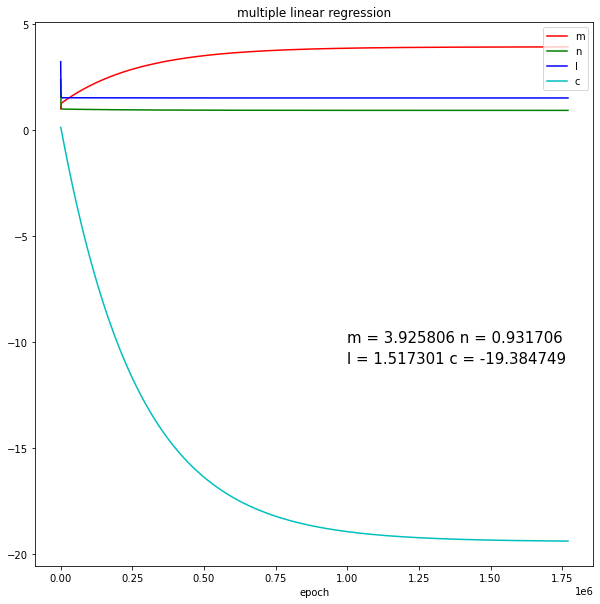

In [40]:
p = np.array(p)
fig, ax = plt.subplots(figsize=(10,10))
plt.title('multiple linear regression')
plt.text(1000000, -10, "m = %f n = %f" %(p[-1,1], p[-1,2] ), fontsize = 15)
plt.text(1000000, -11, "l = %f c = %f" %(p[-1,3], p[-1,4] ), fontsize = 15)
plt.plot(p[:,0],p[:,1],'r',label='m')
plt.plot(p[:,0],p[:,2],'g',label='n')
plt.plot(p[:,0],p[:,3],'b',label='l')
plt.plot(p[:,0],p[:,4],'c',label='c')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.show()